In [2]:
# Se importan las librerías básicas para trabajar los datos y visualizarlos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
DATA_PATH = "data/"
X_t0 = pd.read_parquet(DATA_PATH + "X_t0.parquet")
y_t0 = pd.read_parquet(DATA_PATH + "y_t0.parquet")

df_t0 = pd.concat([X_t0, y_t0], axis=1)
df_t0.head()

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0
4,7712572,1.557217e+09,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1.557217e+09,1.557217e+09,264.0,2,3,-1,0.003008,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0


In [4]:
columns_to_drop = [
    'borrow_block_number',
    'wallet_address',
    'borrow_timestamp',
    'first_tx_timestamp',
    'last_tx_timestamp',
    'risky_first_tx_timestamp',
    'risky_last_tx_timestamp',
    'unique_borrow_protocol_count',
    'unique_lending_protocol_count',
]

df_t0_columns_dropped = df_t0.drop(columns=columns_to_drop, inplace=False)

numeric_features = df_t0_columns_dropped.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_t0_columns_dropped.select_dtypes(include=['object']).columns

df_t0_columns_dropped.shape

(44296, 69)

In [5]:
df_t0_columns_dropped['target'].value_counts()

target
1    22656
0    21640
Name: count, dtype: int64

In [6]:
X_t1 = pd.read_parquet(DATA_PATH + "X_t1_new.parquet").reset_index(drop=True)
y_t1 = pd.read_parquet(DATA_PATH + "y_t1.parquet").reset_index(drop=True)

df_t1 = pd.concat([X_t1, y_t1], axis=1)
df_t1.drop(columns=columns_to_drop, inplace=True)

print(f"Shape of df_t1: {df_t1.shape}")
print(df_t1['target'].value_counts())

Shape of df_t1: (132888, 69)
target
0    82645
1    50243
Name: count, dtype: int64


In [7]:
X = df_t0_columns_dropped.drop(columns=['target'], inplace=False)
y = df_t0_columns_dropped['target']

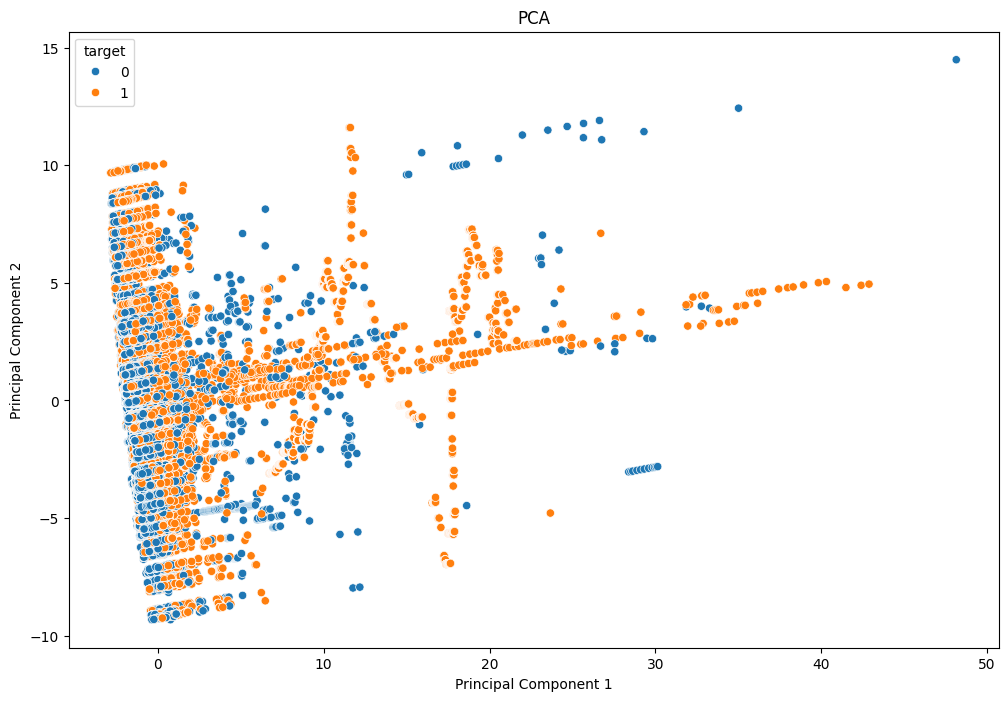

In [8]:
# Hacemos reducimos a 2 dimensiones con PCA
# 0. Preprocesamiento
X_t0 = df_t0_columns_dropped.drop(columns=['target'], inplace=False)
y_t0 = df_t0_columns_dropped['target']

# 1. Preprocesamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_t0)

# 2. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Visualización
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_t0)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

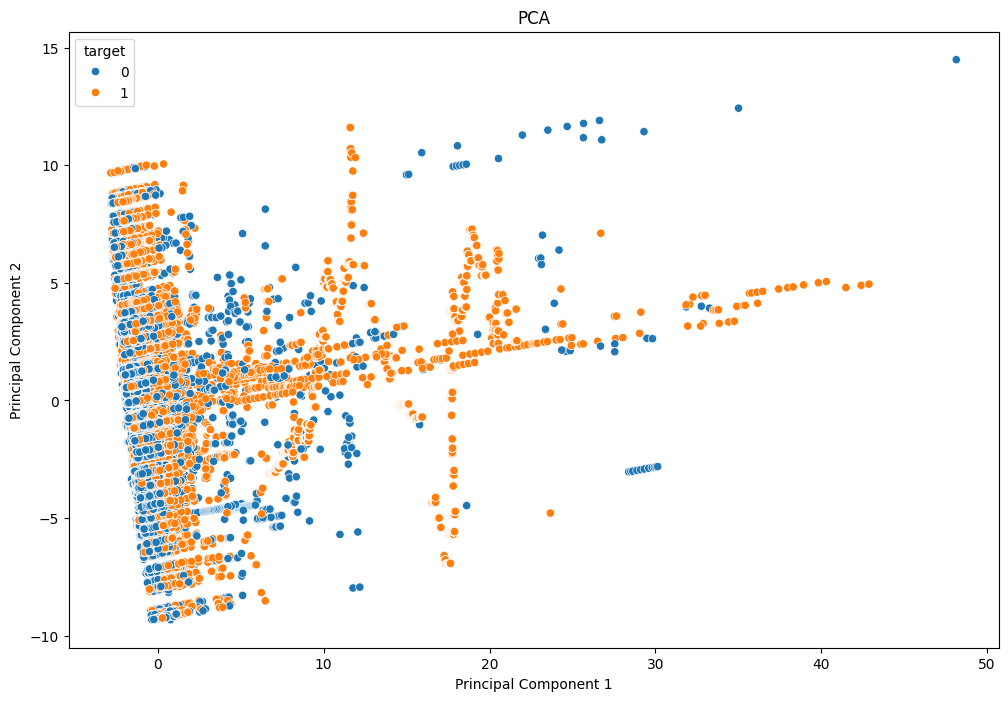

In [9]:
# Hacemos reducimos a 2 dimensiones con PCA
# 0. Preprocesamiento
X_t1 = df_t1.drop(columns=['target'], inplace=False)
y_t1 = df_t1['target']

# 1. Preprocesamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_t0)

# 2. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Visualización
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_t0)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

In [10]:
X_t0

,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_last_tx_timestamp_diff,risky_sum_outgoing_amount_eth,...,market_macdsignal_macdext,market_macdsignal_macdfix,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr
0,19973049.0,199,438,-239,0.397391,0.000981,0,0,0,0.000000,...,-3.468973,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294
1,19973188.0,200,439,-239,0.399063,0.000983,0,0,0,0.000000,...,-3.468973,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294
2,19973238.0,201,440,-239,0.400895,0.000985,0,0,0,0.000000,...,-3.468973,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294
3,13922.0,8,56,-48,0.604001,0.010786,0,0,0,0.000000,...,-3.468973,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294
4,264.0,2,3,-1,0.003008,0.001003,0,0,0,0.000000,...,-3.468973,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,315154.0,50,53,-3,0.280005,0.005283,14,1,314333,1807.190939,...,1.459793,3.971377,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081
44292,3290294.0,536,606,-70,5.723699,0.009445,61,4,993282,5696.864359,...,1.459793,3.971377,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081
44293,24797983.0,393,423,-30,2.343277,0.005540,32,9,762875,8246.551600,...,1.459793,3.971377,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081
44294,31451728.0,45,49,-4,0.331227,0.006901,3,3,79695,0.021024,...,1.459793,3.971377,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081


In [11]:
X_t1

,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_last_tx_timestamp_diff,risky_sum_outgoing_amount_eth,...,market_macdsignal_macdext,market_macdsignal_macdfix,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr
0,41337993.0,12,14,-2,0.015177,0.001084,1,2,0,17.560335,...,1.459793,3.971377,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081
1,27637657.0,189,217,-28,1.162723,0.005358,13,3,521720,113.787495,...,1.459793,3.971377,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081
2,96789742.0,27,32,-5,0.270085,0.008440,3,1,18937,170.000000,...,1.459793,3.971377,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081
3,29496551.0,171,228,-57,0.206756,0.000911,0,0,0,0.000000,...,1.459793,3.971377,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081
4,1339.0,4,3,1,0.010250,0.003417,0,0,0,0.000000,...,1.459793,3.971377,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132883,162332619.0,228,260,-32,4.421527,0.017006,40,24,8453212,19.965556,...,154.458464,113.452663,118.941164,-0.361351,4.799905,30.851881,818.145830,4.748082,0.135601,1.135601
132884,2419145.0,9,7,2,0.220708,0.031530,0,0,0,0.000000,...,154.458464,113.452663,118.941164,-0.361351,4.799905,30.851881,818.145830,4.748082,0.135601,1.135601
132885,21579231.0,432,608,-176,16.245965,0.026720,63,26,21168386,8454.122750,...,154.458464,113.452663,118.941164,-0.361351,4.799905,30.851881,818.145830,4.748082,0.135601,1.135601
132886,25537329.0,483,579,-96,10.114248,0.017529,161,32,22200031,87.511257,...,154.458464,113.452663,118.941164,-0.361351,4.799905,30.851881,818.145830,4.748082,0.135601,1.135601


c:\Users\lucas\python-envs\pycaretenv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\lucas\python-envs\pycaretenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\lucas\python-envs\pycaretenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited at iteration 2000 with accuracies 
[4.63731965e-15 7.40991238e-07 3.78873496e-06 3.00700839e-05]
not reaching the requested tolerance 1.8328428268432617e-06.
Use iteration 1683 instead with accuracy 
1.328770872192498e-06.

  _, diffusion_map = lobpcg(
c:\Users\lucas\python-envs\pycaretenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[1.74917627e-15 3.02016672e-07 3.65115813e-07 4.64794700e-06]
not reaching the reques

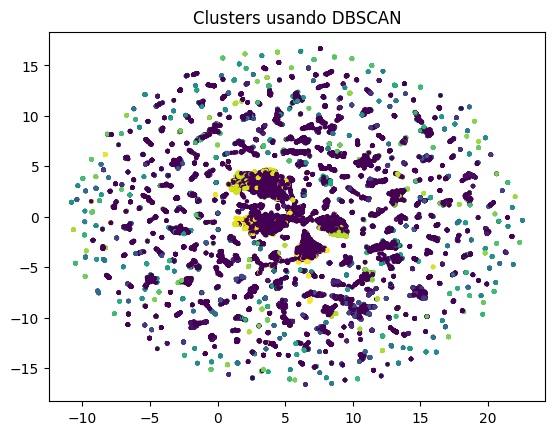

In [33]:
from sklearn.cluster import DBSCAN
import umap

# 2. Reducción de dimensionalidad con UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Visualización
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters_dbscan, cmap='viridis', s=5)
plt.title("Clusters usando DBSCAN")
plt.show()

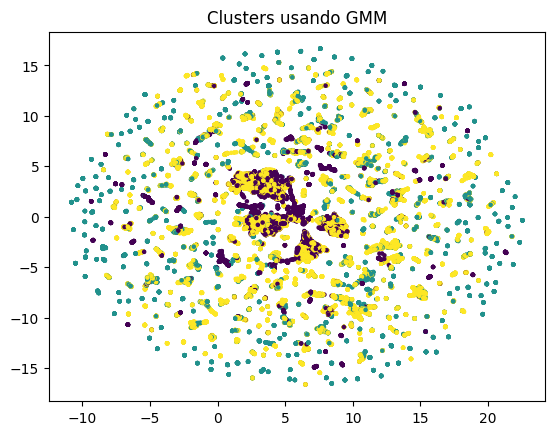

In [34]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)

# Visualización
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=gmm_clusters, cmap='viridis', s=5)
plt.title("Clusters usando GMM")
plt.show()

c:\Users\lucas\python-envs\pycaretenv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\lucas\python-envs\pycaretenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\lucas\python-envs\pycaretenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited at iteration 2000 with accuracies 
[4.63731965e-15 7.40991238e-07 3.78873496e-06 3.00700839e-05]
not reaching the requested tolerance 1.8328428268432617e-06.
Use iteration 1683 instead with accuracy 
1.328770872192498e-06.

  _, diffusion_map = lobpcg(
c:\Users\lucas\python-envs\pycaretenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[1.74917627e-15 3.02016672e-07 3.65115813e-07 4.64794700e-06]
not reaching the reques

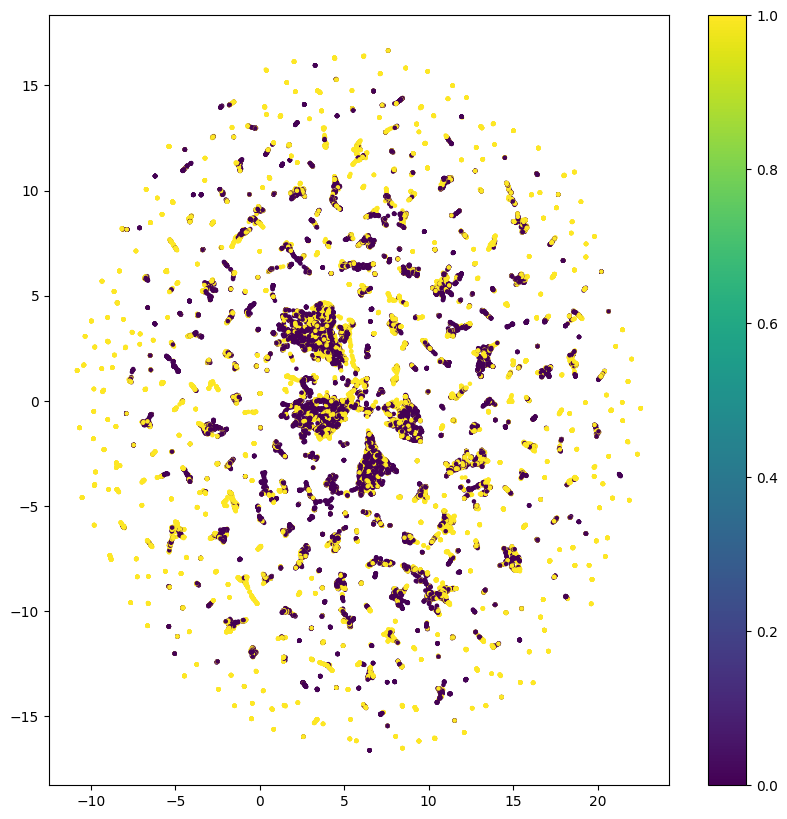

In [8]:
# Hacemos clustering sobre X
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1. Preprocesamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Reducción de dimensionalidad con UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# 3. Clustering con KMeans
n_clusters = 3  # Número de clusters
kmeans = DBSCAN(eps=0.5, min_samples=5)
clusters = kmeans.fit_predict(X_umap)

# Visualizamos los datos en 2D
plt.figure(figsize=(10, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=5)
plt.colorbar()
plt.show()

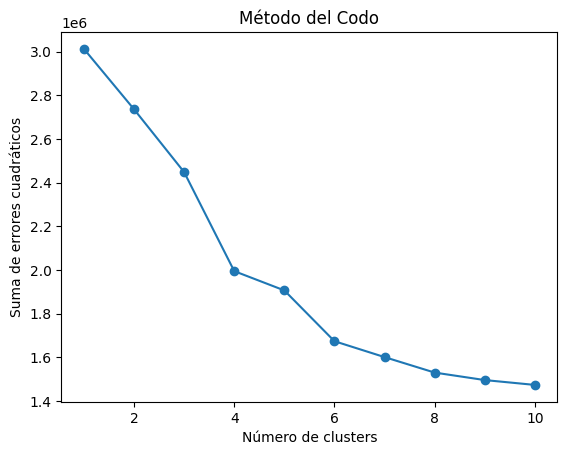

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calcular la suma de los errores cuadráticos para diferentes valores de k
inertia = []
for k in range(1, 11):  # Probar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("Suma de errores cuadráticos")
plt.show()

c:\Users\lucas\python-envs\pycaretenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\lucas\python-envs\pycaretenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited at iteration 2000 with accuracies 
[5.08536236e-15 6.88459605e-07 1.21650472e-06 8.13205266e-06]
not reaching the requested tolerance 1.7881393432617188e-06.
Use iteration 1888 instead with accuracy 
1.7682822157189127e-06.

  _, diffusion_map = lobpcg(
c:\Users\lucas\python-envs\pycaretenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[1.75713271e-15 7.91558717e-07 1.33862928e-06 4.94774047e-06]
not reaching the requested tolerance 1.7881393432617188e-06.
  _, diffusion_map = lobpcg(


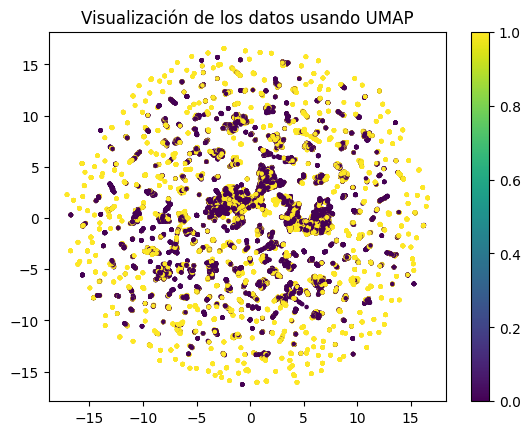

Entrenando modelo para el cluster 0
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1153
           1       0.95      0.88      0.91      1231

    accuracy                           0.91      2384
   macro avg       0.91      0.91      0.91      2384
weighted avg       0.91      0.91      0.91      2384

Accuracy: 0.9119127516778524
Entrenando modelo para el cluster 1
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       886
           1       0.92      0.87      0.90       993

    accuracy                           0.89      1879
   macro avg       0.89      0.89      0.89      1879
weighted avg       0.89      0.89      0.89      1879

Accuracy: 0.8924960085151676
Entrenando modelo para el cluster 2
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2267
           1       0.92      0.79      0.85      1878

    accuracy    

In [32]:
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 3: Reducción de dimensionalidad con UMAP para visualización
umap_reducer = umap.UMAP(n_components=2)  # Reducir a 2 dimensiones para visualización
X_umap = umap_reducer.fit_transform(X_scaled)

# Visualización de los clusters usando UMAP
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=5)
plt.colorbar()
plt.title("Visualización de los datos usando UMAP")
plt.show()

# Paso 4: Clustering (por ejemplo, KMeans)
kmeans = KMeans(n_clusters=4, random_state=42)  # Ajusta el número de clusters según tus datos
clusters = kmeans.fit_predict(X_scaled)

# Paso 5: Entrenar un modelo de clasificación por cada cluster
# Aquí, dividimos los datos por cada cluster
models = []
for cluster_id in np.unique(clusters):
    print(f"Entrenando modelo para el cluster {cluster_id}")
    
    # Filtramos los datos del cluster
    X_cluster = X_scaled[clusters == cluster_id]
    y_cluster = y.iloc[clusters == cluster_id]

    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Entrenamos un modelo de clasificación (por ejemplo, Random Forest)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    models.append(model)

    # Evaluamos el modelo en el conjunto de prueba
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Paso 6: Evaluación global
# Se puede calcular la precisión global para todos los clusters combinados
y_pred_global = np.concatenate([model.predict(X_scaled[clusters == cluster_id]) for cluster_id, model in enumerate(models)])
print("Reporte de clasificación global:")
print(classification_report(y, y_pred_global))

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Pipeline para características numéricas con PCA
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),   # Hay que ver si distributen normal o es mejor otro scaler
#    ('pca', PCA(n_components=50))  # Reduce a 50 componentes principales
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features.drop('target')),  # Numéricas con PCA
        ('cat', categorical_transformer, categorical_features)  # Categóricas con OneHot
    ]
)

In [8]:
from sklearn.model_selection import train_test_split

X = df_t0_columns_dropped.drop(columns='target')
y = df_t0_columns_dropped['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, stratify=y_t0, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, stratify=y_temp, random_state=42)
X_train.shape, X_val.shape, X_test.shape

((31007, 68), (6644, 68), (6645, 68))

In [9]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

y_train = np.array(y_train).ravel()
y_val = np.array(y_val).ravel()
y_test = np.array(y_test).ravel()